In [1]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')

from datetime import datetime
from tqdm import tqdm
from collections import Counter
import swifter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [4]:
path = Fontmanager()

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [5]:
women_policy = pd.read_csv('dataset/women_policy_sm_best.csv')
minister = pd.read_csv('dataset/minister_sm_best.csv')
repeal = pd.read_csv('dataset/repeal_sm_best.csv')

In [6]:
# women_policy2 = pd.read_csv('dataset/women_policy.csv')

In [7]:
# women_policy['text'] = women_policy2['text']

In [8]:
# 혹시 모를 중복제거
women_policy = women_policy.drop_duplicates()
minister = minister.drop_duplicates()
repeal = repeal.drop_duplicates()

In [9]:
# 혹시 모를 nan값 확인
women_policy.isna().sum()

datetime       0
id             0
text           0
username       0
tokenized      0
label          0
score          0
label_word     0
text_re        0
multi_label    0
sm_label       0
sm_score       0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
dtype: int64

In [10]:
minister.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
sm_label       0
sm_score       0
dtype: int64

In [11]:
repeal.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
sm_label       0
sm_score       0
dtype: int64

In [12]:
repeal = repeal.dropna()

In [13]:
repeal = repeal[repeal['username'] != 'miganHeart']

In [14]:
repeal = repeal[~repeal['text'].str.contains('#자격증')]
repeal = repeal[~repeal['text'].str.contains('#PIA사설탐정')]

In [15]:
repeal = repeal[repeal['username'] != 'OhmyNews_Korea']

In [16]:
minister = minister[minister['username'] != 'OhmyNews_Korea']

In [17]:
women_policy = women_policy[women_policy['username'] != 'OhmyNews_Korea']

## hashtag

In [18]:
def hashtag_preprocessing(df,column):
    texts = df[column.str.contains('#')]
    texts['text_t'] = texts['text'].str.split()
    word_of_Bag = sum(texts['text_t'], [])
    word_of_Bag = [word for word in word_of_Bag if word.startswith('#') != False]
    word_of_Bag = [word for word in word_of_Bag if not (len(word) == 0)]
    return word_of_Bag

In [19]:
def hashtag_count(word_of_bag):
    set_wob = set(word_of_bag)
    list_wob = list(set_wob)
    key = list_wob
    value = [word_of_bag.count(i) for i in list_wob]
    df = pd.DataFrame({'key':key, 'value':value})
    df = df[df['value'] > 5]
    return df

In [20]:
word_of_Bag_w = hashtag_preprocessing(women_policy, women_policy['text'])
word_of_Bag_w_df = hashtag_count(word_of_Bag_w)

<ipython-input-18-572442dfe633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text_t'] = texts['text'].str.split()


In [21]:
word_of_Bag_m = hashtag_preprocessing(minister, minister['text'])
word_of_Bag_m_df = hashtag_count(word_of_Bag_m)

<ipython-input-18-572442dfe633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text_t'] = texts['text'].str.split()


In [22]:
word_of_Bag_r = hashtag_preprocessing(repeal, repeal['text'])
word_of_Bag_r_df = hashtag_count(word_of_Bag_r)

<ipython-input-18-572442dfe633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text_t'] = texts['text'].str.split()


In [113]:
class hashtag:
    def __init__(self, df, column):
        self.df = df
        self.column = column
        
        self.word_of_Bag = self.preprocessing()
        self.data = self.count()
        self.graph()
        
    def preprocessing(self):
        texts = self.df[self.column.str.contains('#')]
        texts['text_t'] = texts['text'].str.split()
        word_of_Bag = sum(texts['text_t'], [])
        word_of_Bag = [word for word in word_of_Bag if word.startswith('#') != False]
        word_of_Bag = [word for word in word_of_Bag if not (len(word) == 0)]
        return word_of_Bag
    
    def count(self):
        set_wob = set(self.word_of_Bag)
        list_wob = list(set_wob)
        key = list_wob
        value = [self.word_of_Bag.count(i) for i in list_wob]
        data = pd.DataFrame({'key':key, 'value':value})
        data = data[data['value'] > 5]
        return data
    
    def graph(self):
        plt.figure(figsize=(20, 10))
        plot = sns.barplot(self.data['key'], self.data['value'])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.title('most common hashtag', fontsize=20)
        plt.legend(fontsize=15)
        

<ipython-input-113-0af2cfa0dcec>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No handles with labels found to put in legend.


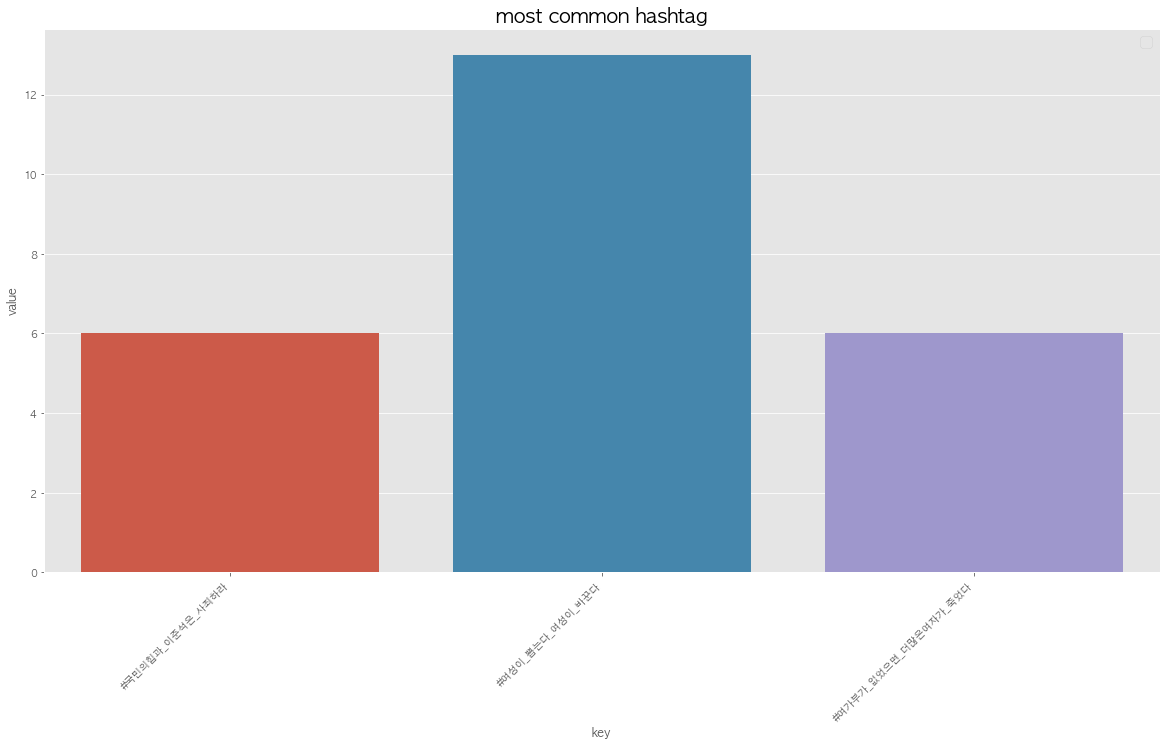

In [114]:
hashtag(women_policy, women_policy['text'])

No handles with labels found to put in legend.


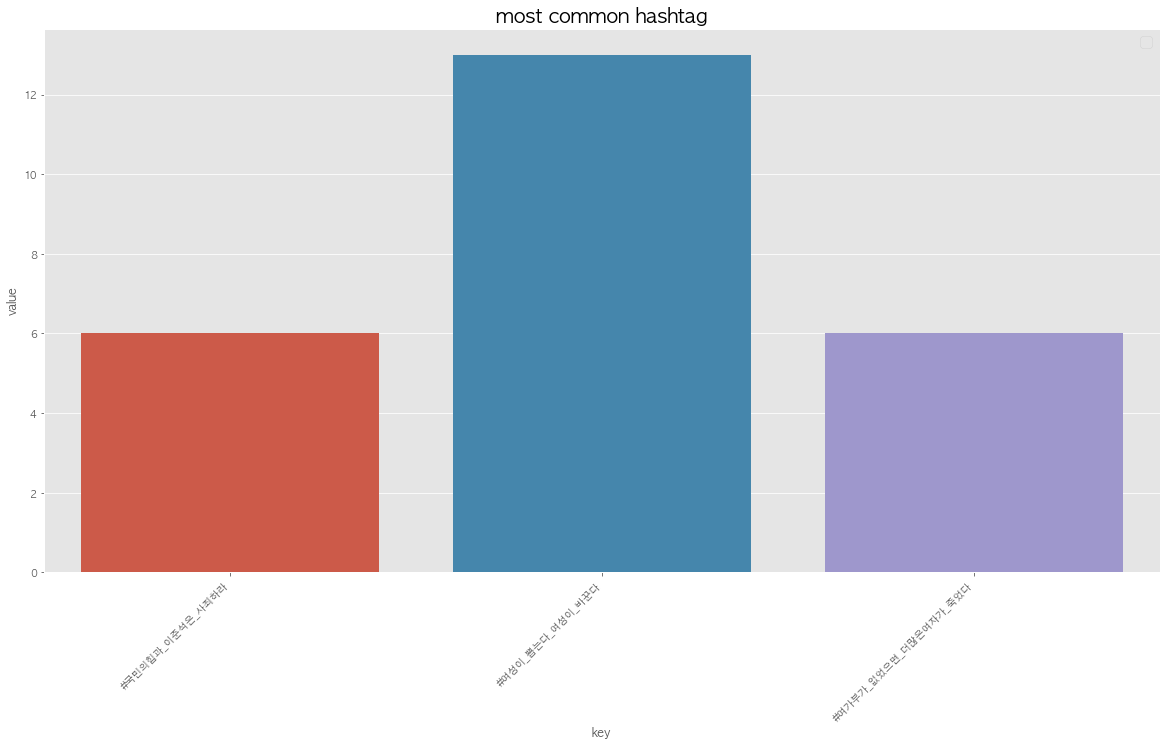

In [107]:
# women policy hashtag graph
plt.figure(figsize=(20, 10))
plot = sns.barplot(word_of_Bag_w_df['key'], word_of_Bag_w_df['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('women policy hashtag graph')

No handles with labels found to put in legend.


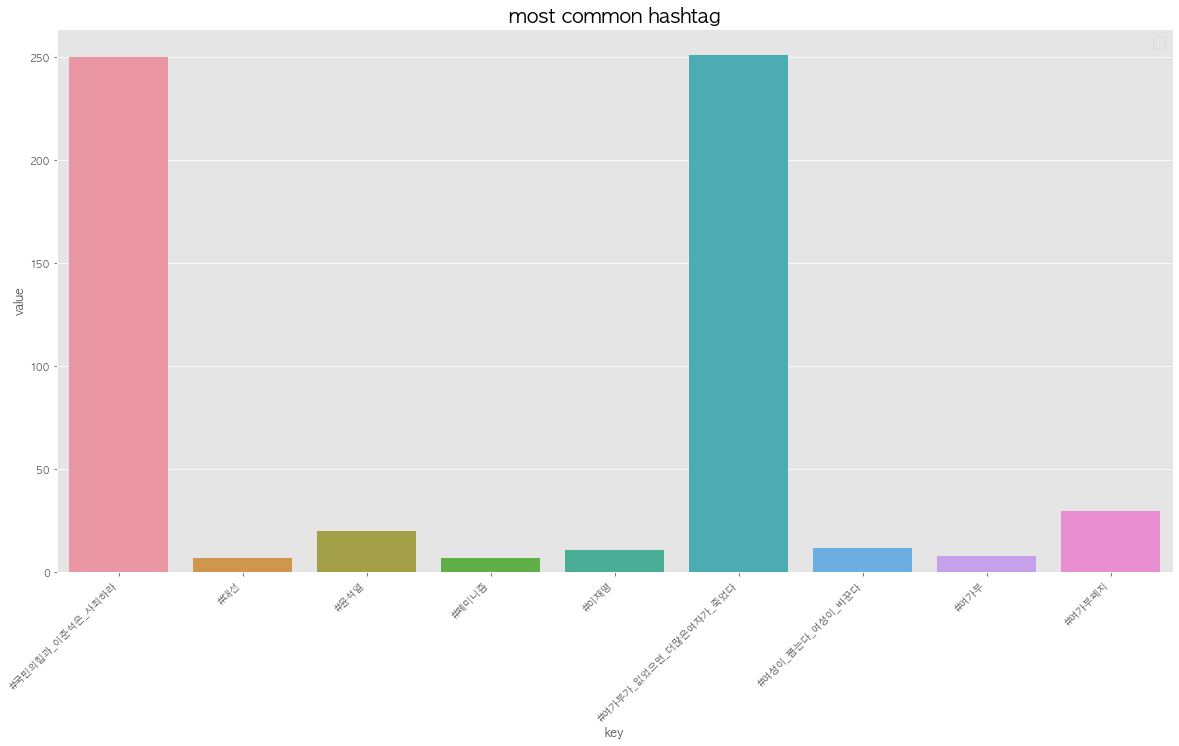

In [24]:
# minister hashtag graph
plt.figure(figsize=(20, 10))
plot = sns.barplot(word_of_Bag_m_df['key'], word_of_Bag_m_df['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('minister hashtag graph')

No handles with labels found to put in legend.


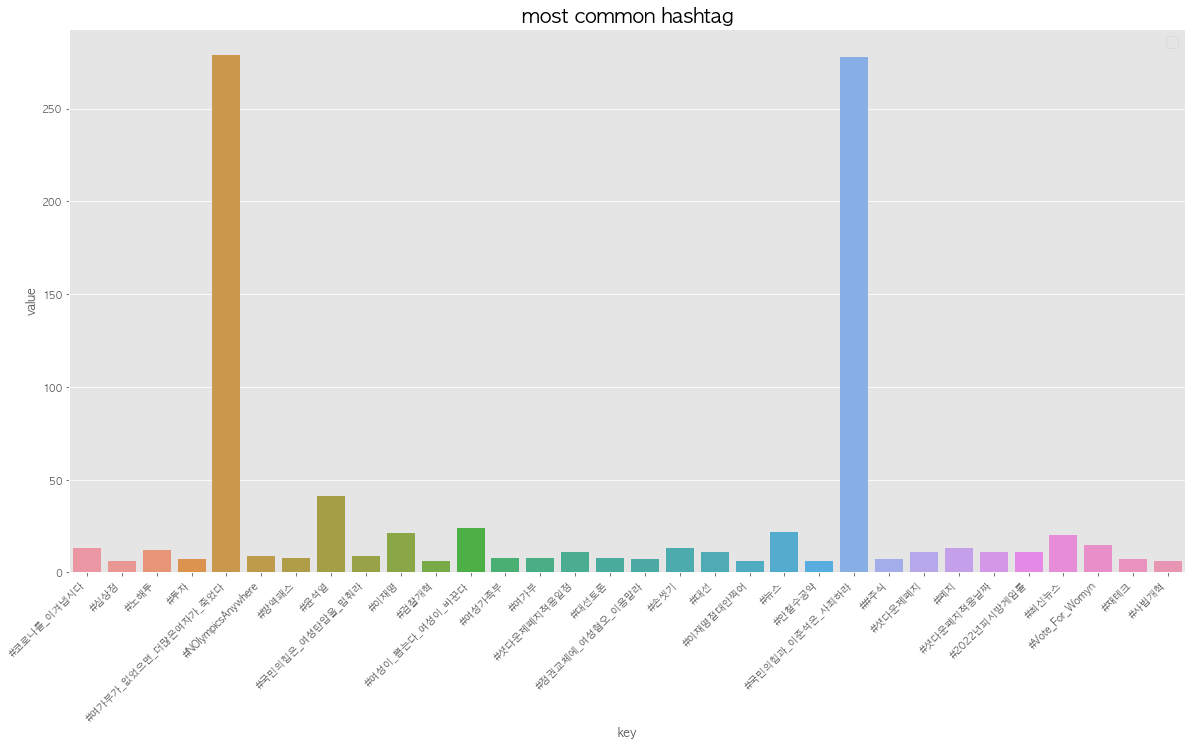

In [25]:
# repeal hashtag graph
plt.figure(figsize=(20, 10))
plot = sns.barplot(word_of_Bag_r_df['key'], word_of_Bag_r_df['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('repeal hashtag graph')

### 전처리

In [26]:
# 정규표현식 이용한 전처리
def clean(text):
    #\n 공백 제거
    text = re.sub('\n',' ',str(text))
    # &gt; &lt; &amp;
    text = re.sub('[&]+[a-z]+', '', str(text))
    # URL 제거
    text = re.sub('https://[A-Za-z0-9./]*','',str(text))
    # 한글자 제거 (ex:ㅋㅋ, ㅜㅜ)
    text = re.sub('([ㄱ-ㅎㅏ-ㅣ])+', '', str(text))
    # 숫자 제거 (숫자 + 숫자만 제거, ex: 1인가족)
    text= re.sub('[0-9]{2}', '', str(text))
    # @알파벳 제거 
    text = re.sub('@[A-Za-z0-9./]*','',str(text))
#     # 숫자 문자외 제거
#     text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    return str(text)

## who did tweet the most

In [27]:
women_policy['text'] = women_policy['text'].apply(lambda x : clean(x))
minister['text'] = minister['text'].apply(lambda x : clean(x))
repeal['text'] = repeal['text'].apply(lambda x : clean(x))

그림 저장: who did tweet the most w


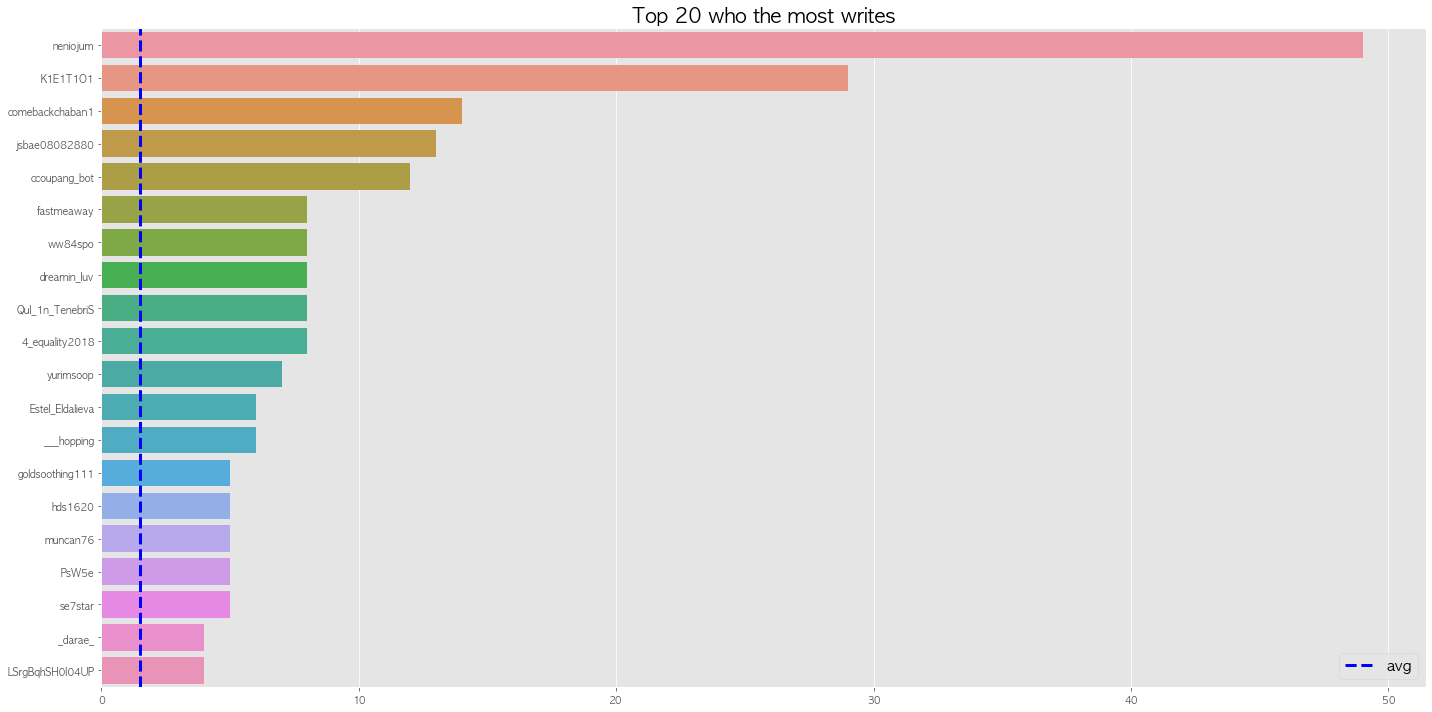

In [28]:
# women_policy
plt.figure(figsize=(20,10))
sns.barplot(x=women_policy['username'].value_counts()[:20].values, 
            y=women_policy['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(women_policy['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most w')

그림 저장: who did tweet the most m


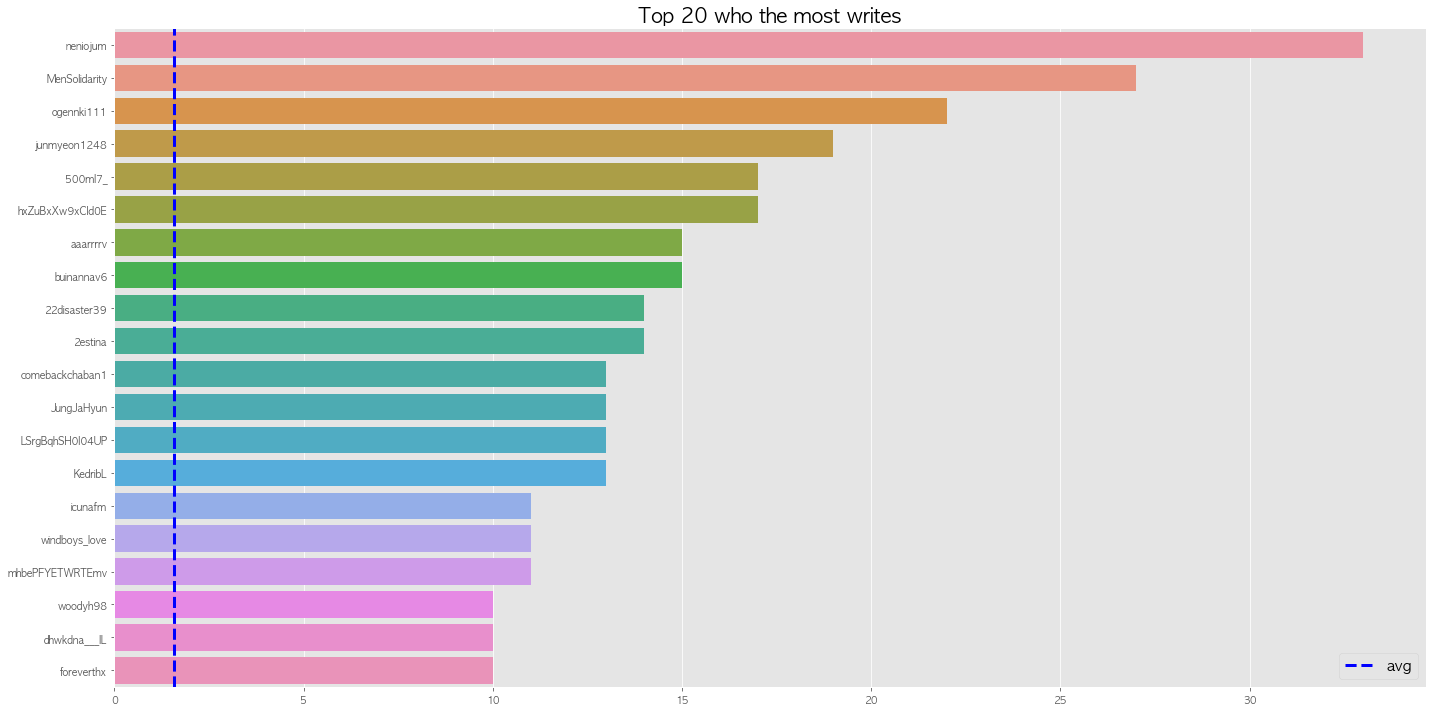

In [29]:
# minister
plt.figure(figsize=(20,10))
sns.barplot(x=minister['username'].value_counts()[:20].values, 
            y=minister['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(minister['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most m')

그림 저장: who did tweet the most r


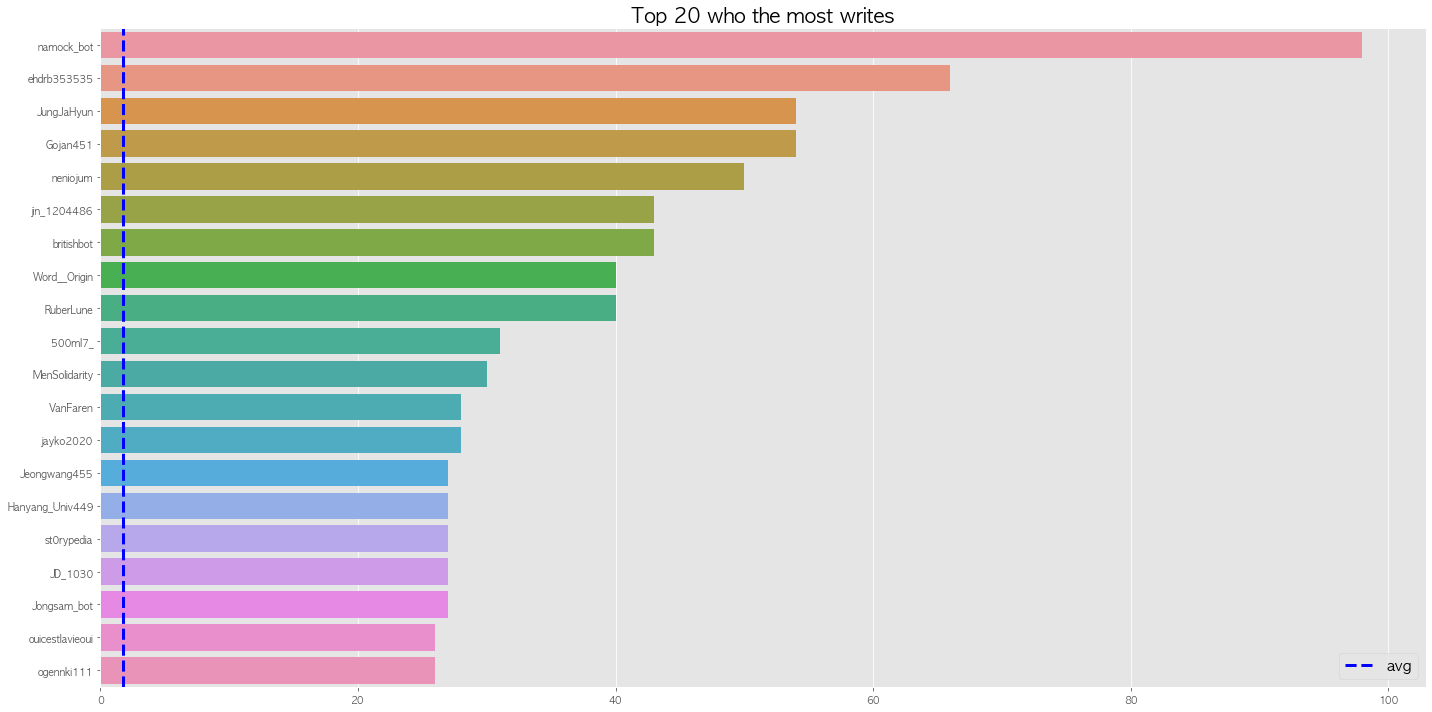

In [30]:
# minister
plt.figure(figsize=(20,10))
sns.barplot(x=repeal['username'].value_counts()[:20].values, 
            y=repeal['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(repeal['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most r')

## the lengths of the sentences

그림 저장: the lengths of the sentences w


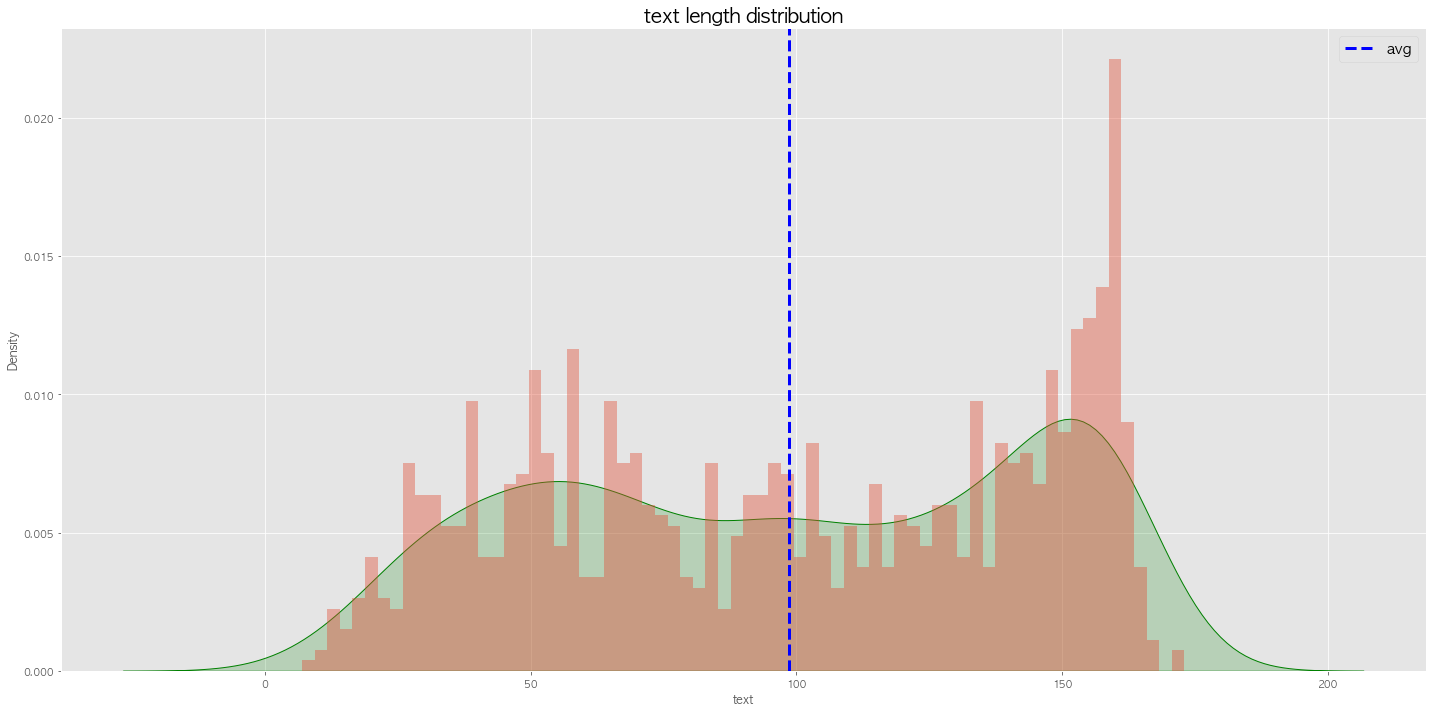

In [31]:
# women_policy
plt.figure(figsize=(20,10))
sns.distplot(a=women_policy['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(women_policy['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences w')

그림 저장: the lengths of the sentences m


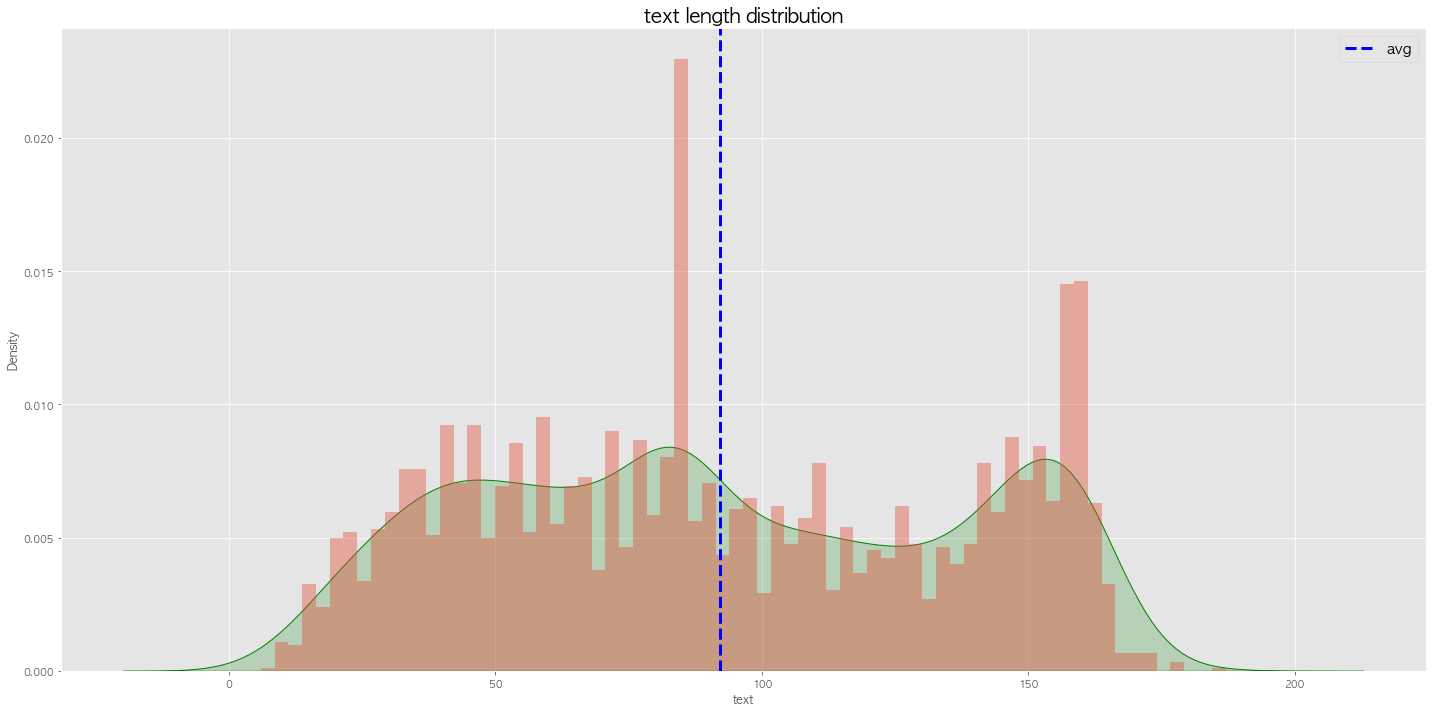

In [32]:
# minister
plt.figure(figsize=(20,10))
sns.distplot(a=minister['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(minister['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences m')

그림 저장: the lengths of the sentences r


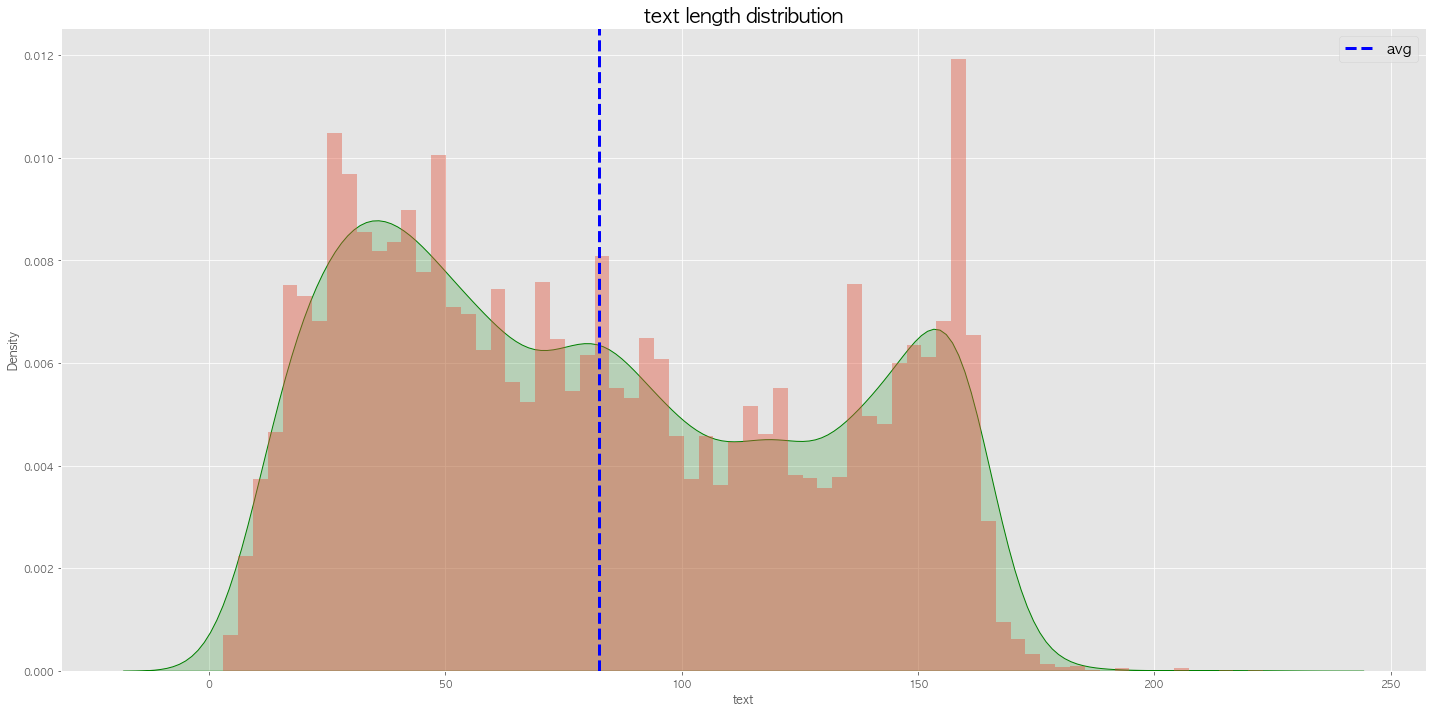

In [33]:
# repeal
plt.figure(figsize=(20,10))
sns.distplot(a=repeal['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(repeal['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences r')

### Tokenizing

In [34]:
# tokenizer
# kkma = Kkma()
# komoran = Komoran()
# okt = Okt()
mecab = Mecab()

# stopwords list
stop_words = pd.read_csv('dataset/한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])

def preprocessing_mecab(sentence):
    #### Tokenize
    morphs = mecab.pos(sentence)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [35]:
women_policy['tokenized'] = women_policy['text'].apply(lambda x: preprocessing_mecab(x))
women_policy['tokenized'] = women_policy['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

minister['tokenized'] = minister['text'].apply(lambda x: preprocessing_mecab(x))
minister['tokenized'] = minister['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

In [36]:
repeal['tokenized'] = repeal['text'].apply(lambda x: preprocessing_mecab(x))
repeal['tokenized'] = repeal['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

## wordcloud

In [37]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def wordcloud(c):
    wc = WordCloud(font_path='Arial Unicode', width=1000, height=1000, background_color ='white', scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(c)
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(gen)
    plt.axis("off")
    plt.tight_layout(pad=0)
    # save_fig("most_common_words_wordcloud")
    
def cw_table(cw):
    df = pd.DataFrame(cw, columns=['keywords', 'count'])
    return df

그림 저장: wordcloud w


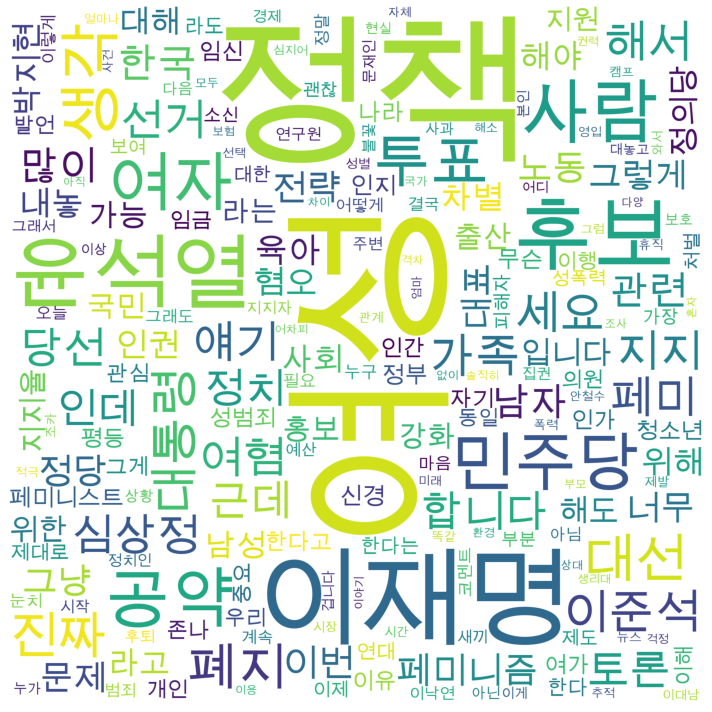

In [38]:
# women_policy
words_sum = sum(women_policy['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud w')

그림 저장: wordcloud m


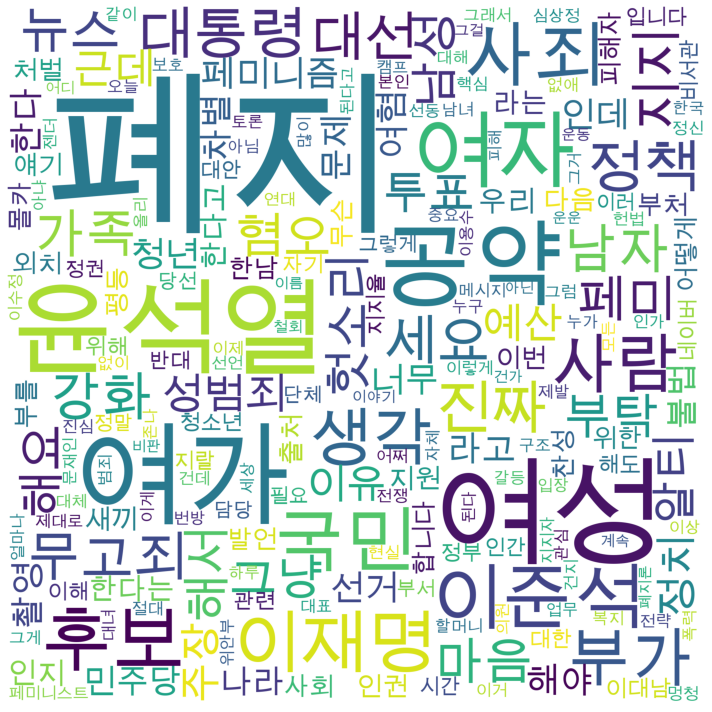

In [39]:
# minister
words_sum = sum(minister['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud m')

그림 저장: wordcloud r


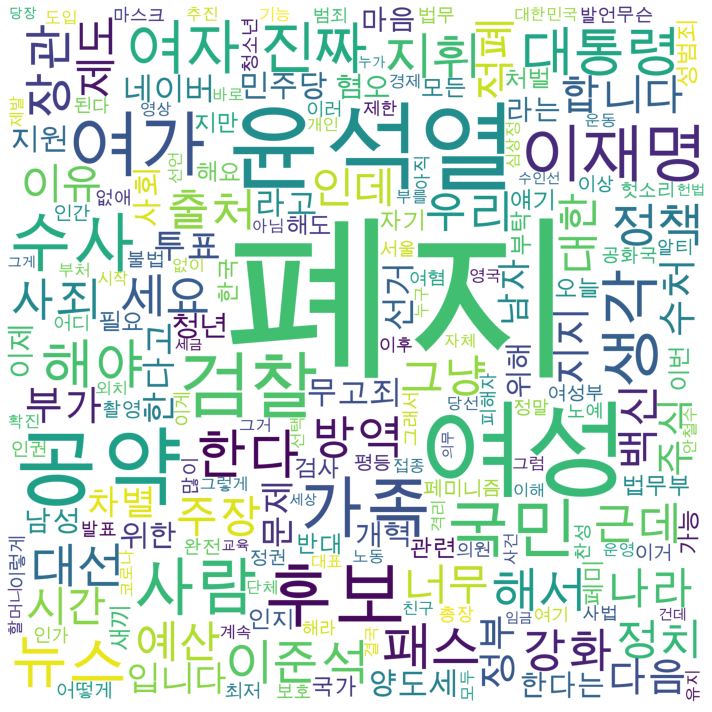

In [40]:
# repeal
words_sum = sum(repeal['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud r')

In [41]:
women_policy_w = women_policy.copy()
minister_m = minister.copy()
repeal_r = repeal.copy()

그림 저장: wordcloud without w


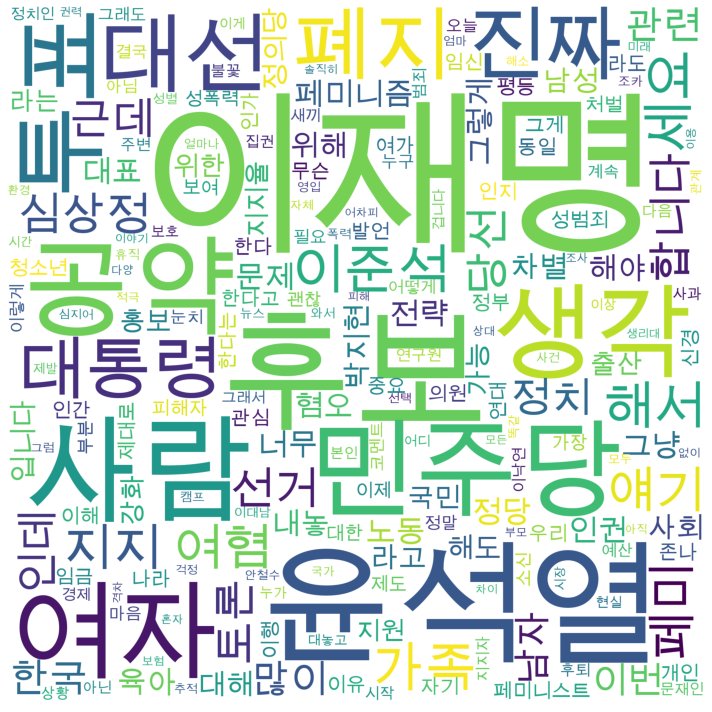

In [42]:
# women_policy without 여성, 정책
stop_words_w = ['여성', '정책']
women_policy_w['tokenized'] = women_policy_w['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(women_policy_w['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without w')

그림 저장: wordcloud without m


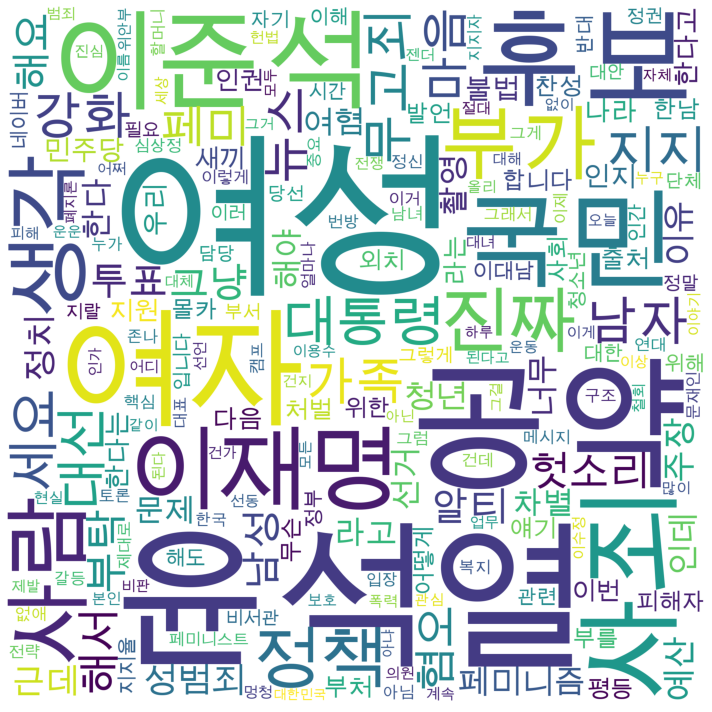

In [43]:
# minister without 여가부, 폐지
# 여가가 여가부 같으니
stop_words_m = ['여가부', '폐지', '여가']
minister_m['tokenized'] = minister_m['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_m])

words_sum = sum(minister_m['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without m')

그림 저장: wordcloud without r


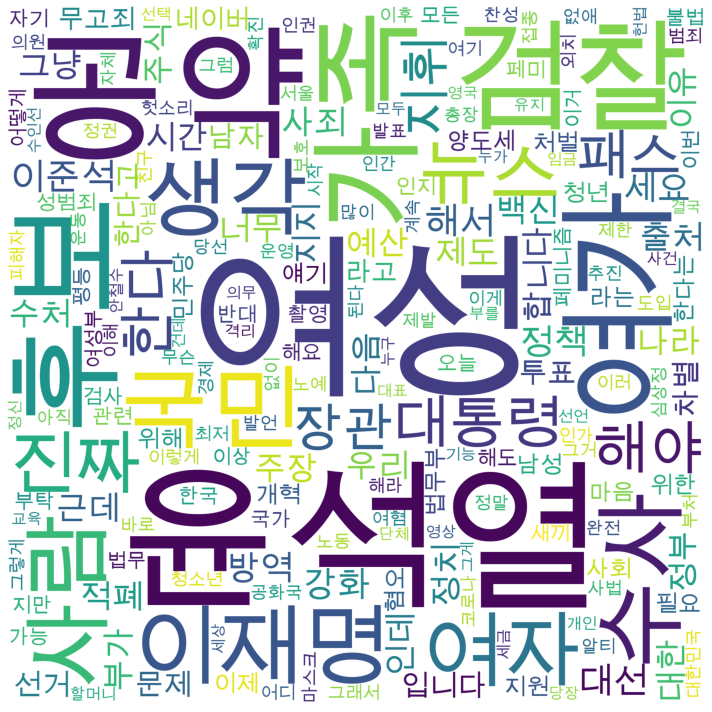

In [44]:
# repeal without 폐지
# 여가가 여가부 같으니
stop_words_r = ['폐지']
repeal_r['tokenized'] = repeal_r['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_r])

words_sum = sum(repeal_r['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without r')

<ipython-input-45-eecf96dd6433>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['tokenized'] = lee['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_lee])


keywords  count
0      윤석열    121
1       후보     73
2       공약     62
3       사람     49
4       여자     49
5      민주당     46
6       생각     44
7       투표     42
8       세요     39
9      합니다     37

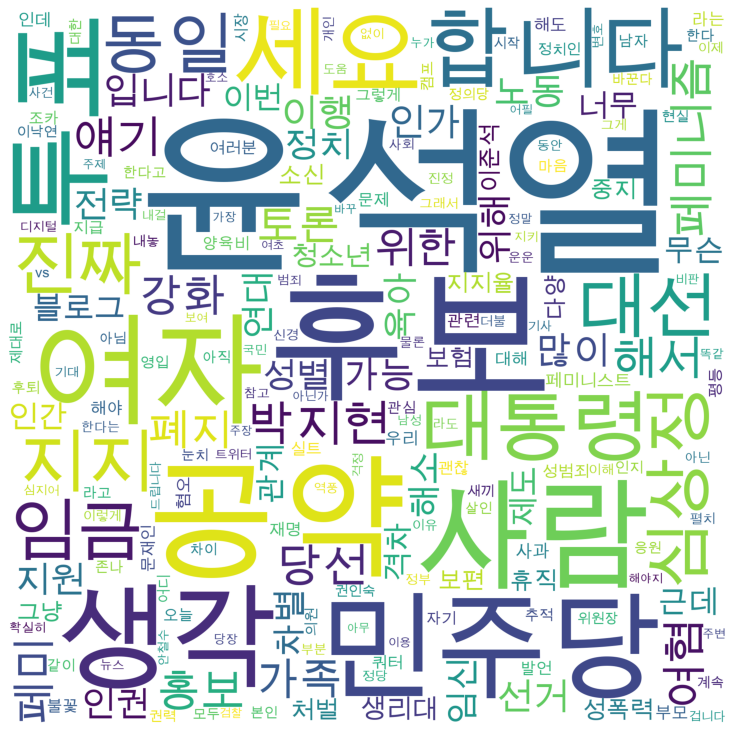

In [45]:
# women_policy
# '이재명' 포함한 문장
stop_words_lee=['이재명']
lee = women_policy_w[women_policy_w['text'].str.contains('이재명')]

lee['tokenized'] = lee['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_lee])

# wordcloud
words_sum = sum(lee['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
# save_fig('wordcloud lee')

## the most common words by date

In [46]:
women_policy_w['date'] = pd.to_datetime(women_policy_w['datetime']).apply(lambda x: x.date())
women_policy_w['date_re'] = women_policy_w['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in women_policy_w['date_re'].unique():
    tokenizing = sum(women_policy_w[women_policy_w['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

In [47]:
def add_value_labels(ax, word, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(word[idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)  

No handles with labels found to put in legend.


그림 저장: most common word by date w


No handles with labels found to put in legend.


그림 저장: distribution by date w


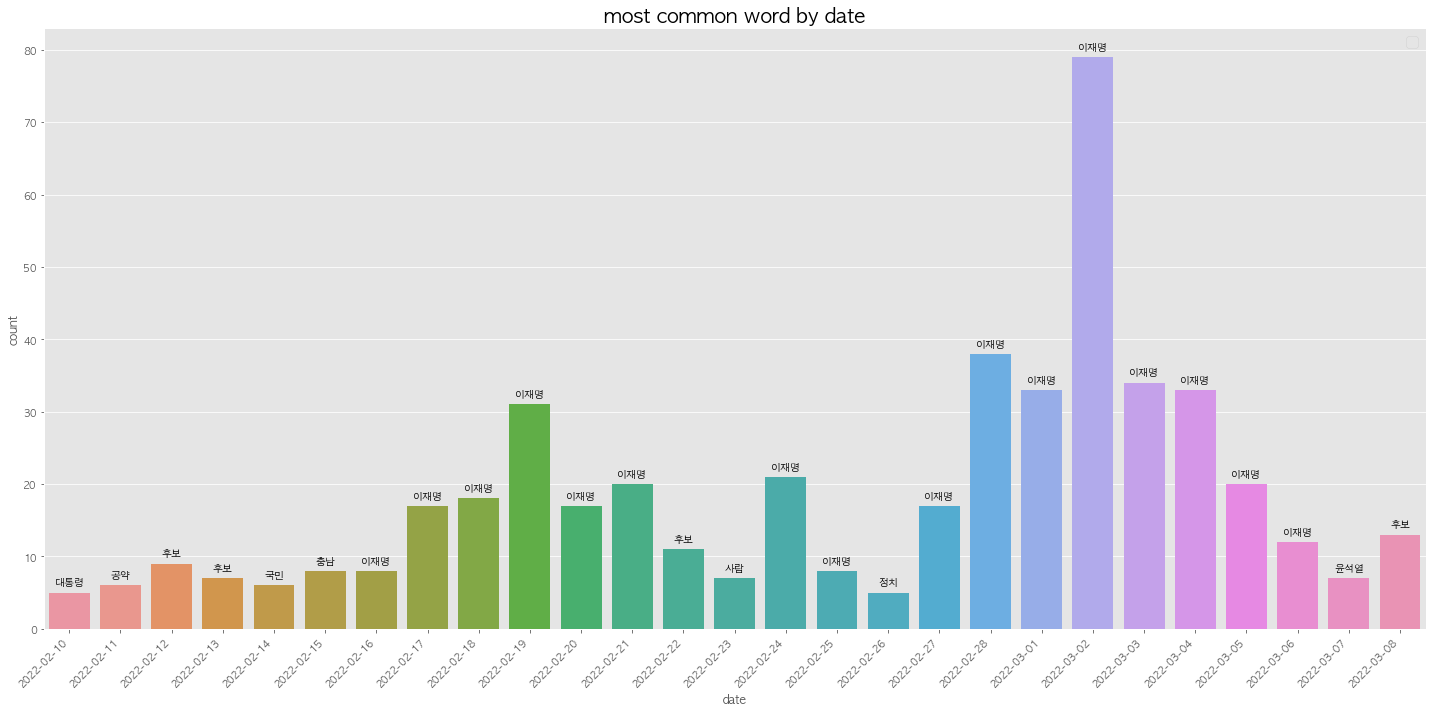

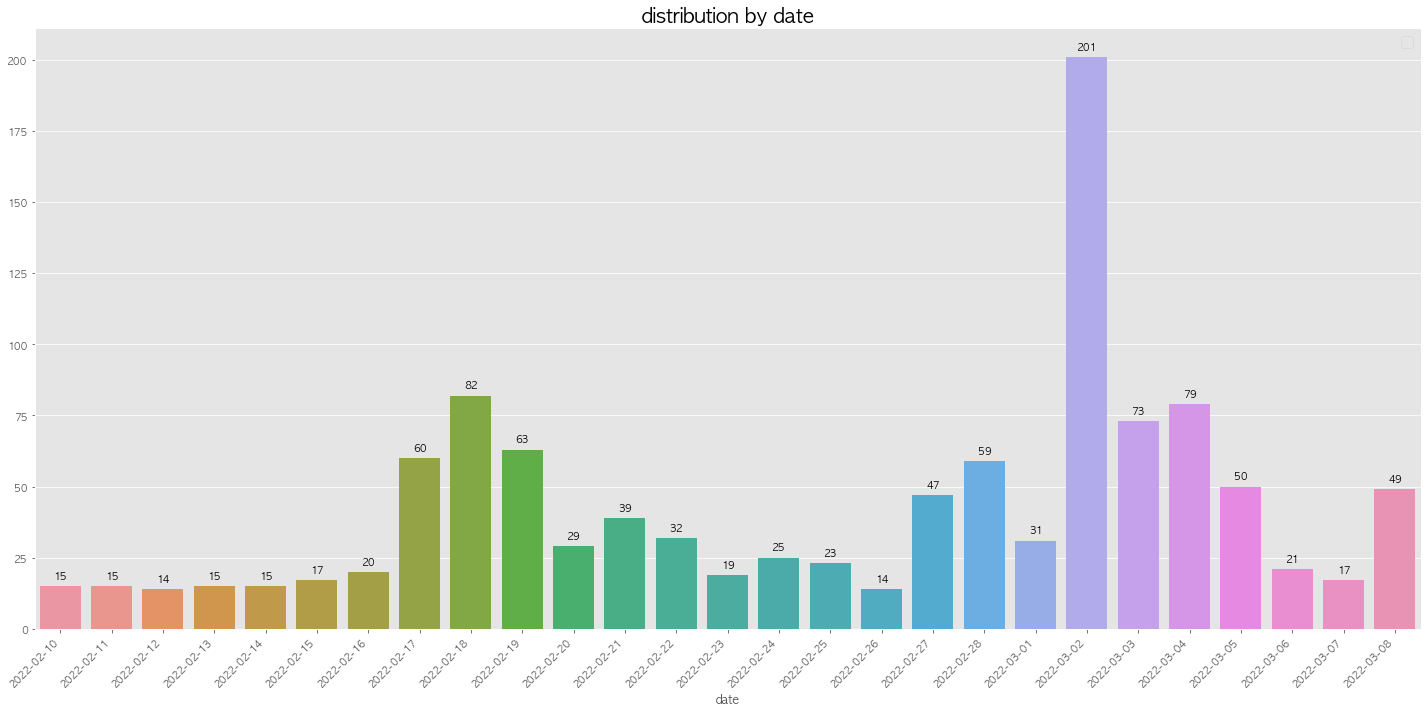

In [48]:
# women policy
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date w")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(women_policy_w.groupby('date').count()['date_re'].index,
                   women_policy_w.groupby('date').count()['date_re'].values)
add_value_labels(ax, women_policy_w.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date w")

In [49]:
# minister
minister_m['date'] = pd.to_datetime(minister_m['datetime']).apply(lambda x: x.date())
minister_m['date_re'] = minister_m['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in minister_m['date_re'].unique():
    tokenizing = sum(minister_m[minister_m['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

No handles with labels found to put in legend.


그림 저장: most common word by date m


No handles with labels found to put in legend.


그림 저장: distribution by date m


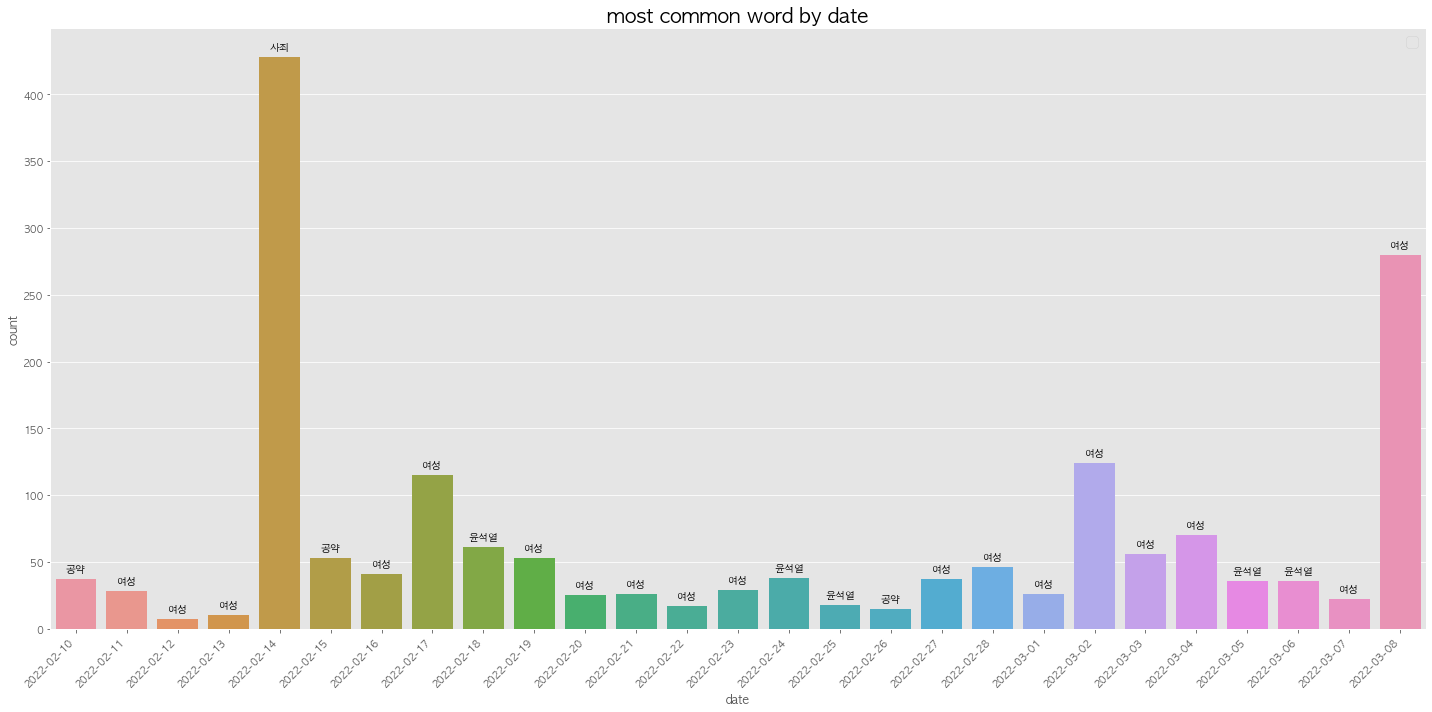

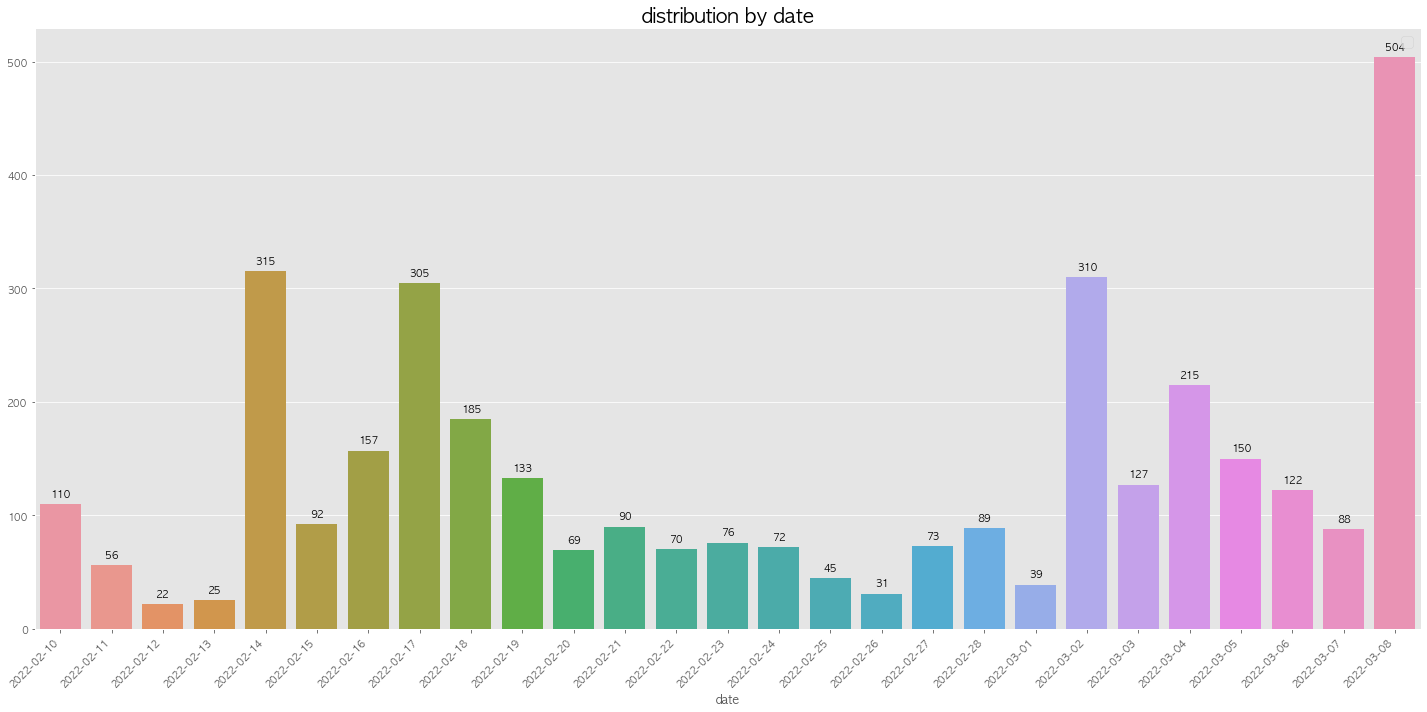

In [50]:
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date m")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(minister_m.groupby('date').count()['date_re'].index,
                   minister_m.groupby('date').count()['date_re'].values)
add_value_labels(ax, minister_m.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date m")

In [51]:
# #국민의힘과_이준석은_사죄하라 해시 태그 운동

In [52]:
# repeal
repeal_r['date'] = pd.to_datetime(repeal_r['datetime']).apply(lambda x: x.date())
repeal_r['date_re'] = repeal_r['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in repeal_r['date_re'].unique():
    tokenizing = sum(repeal_r[repeal_r['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

No handles with labels found to put in legend.


그림 저장: most common word by date r


No handles with labels found to put in legend.


그림 저장: distribution by date r


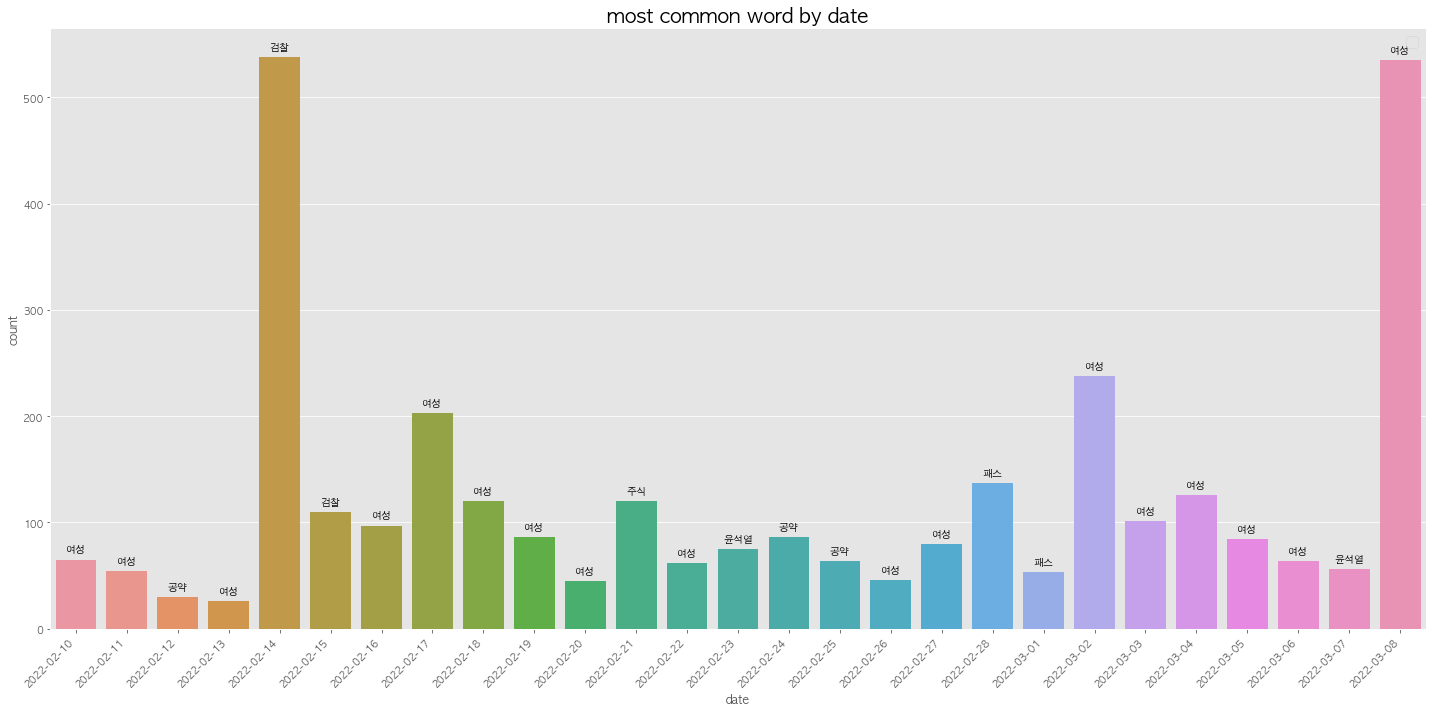

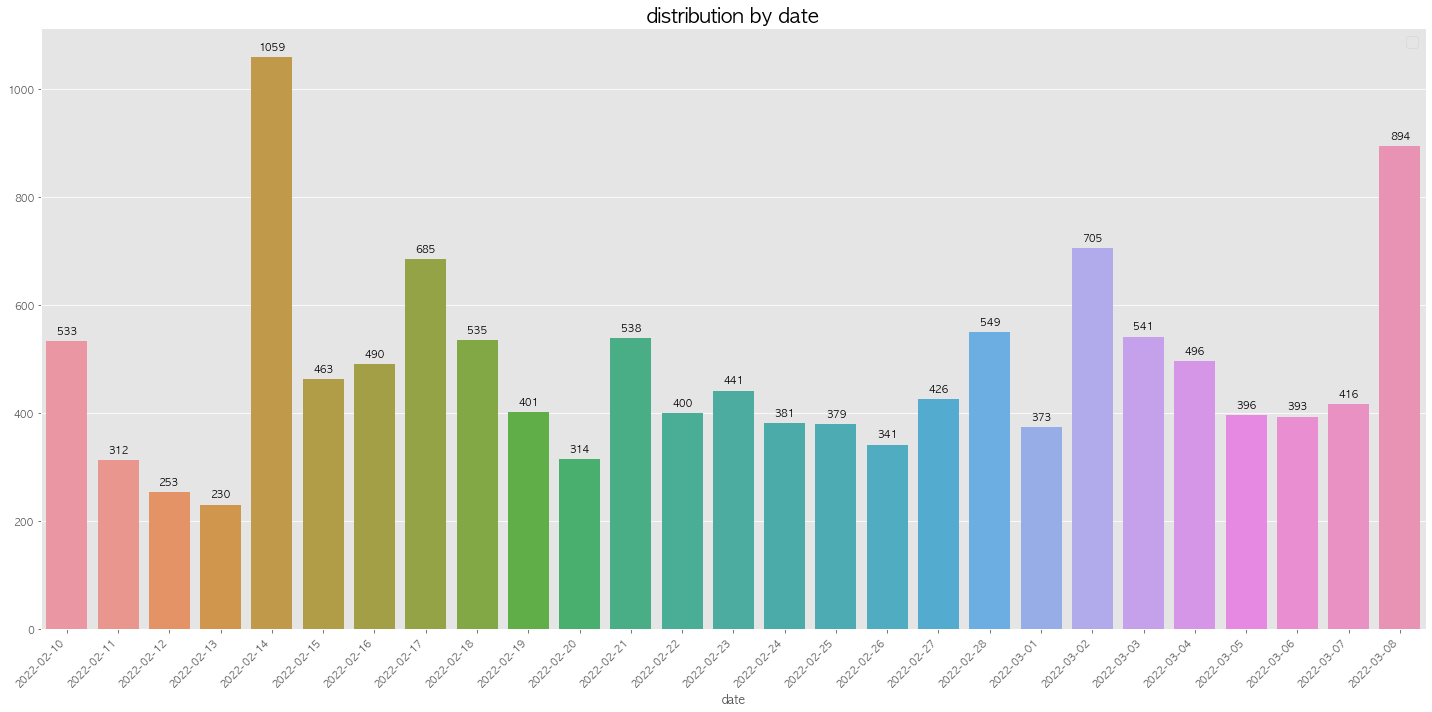

In [75]:
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date r")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(repeal_r.groupby('date').count()['date_re'].index,
                   repeal_r.groupby('date').count()['date_re'].values)
add_value_labels(ax, repeal_r.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date r")

In [79]:
first = minister_m[minister_m['text'].str.contains("#여가부가_없었으면_더많은여자가_죽었다")]

In [86]:
second = minister_m[minister_m['text'].str.contains("#국민의힘과_이준석은_사죄하라")]

## multi label distribution

No handles with labels found to put in legend.


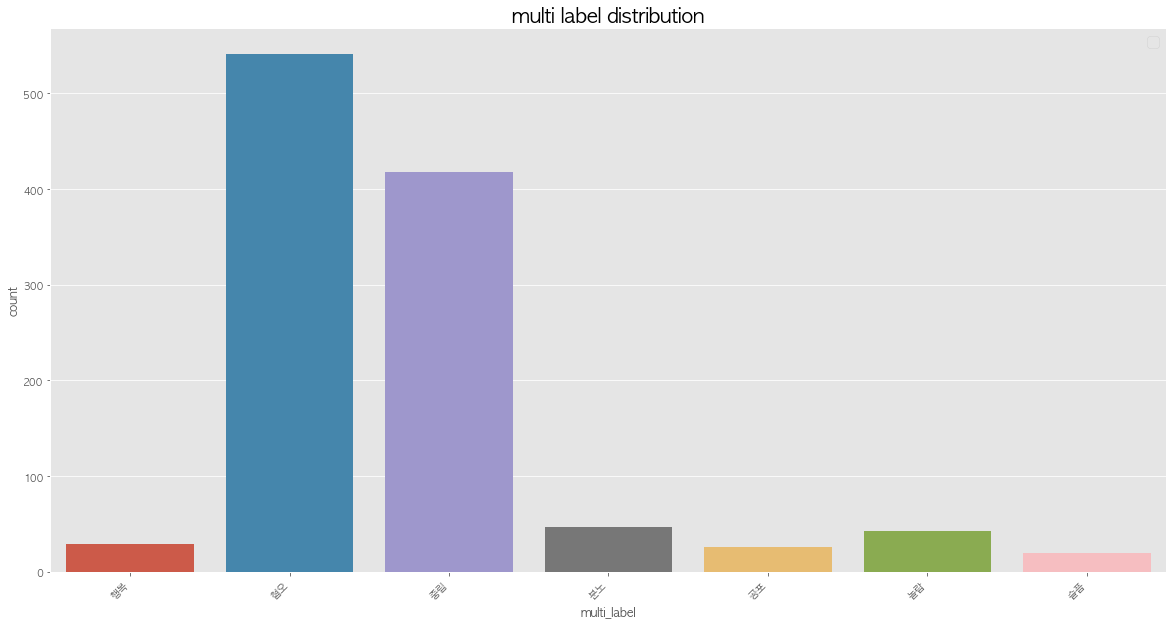

In [54]:
# women_policy
plt.figure(figsize=(20,10))
plot = sns.countplot(women_policy['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('multi label distribution w')

No handles with labels found to put in legend.


그림 저장: multi label distribution m


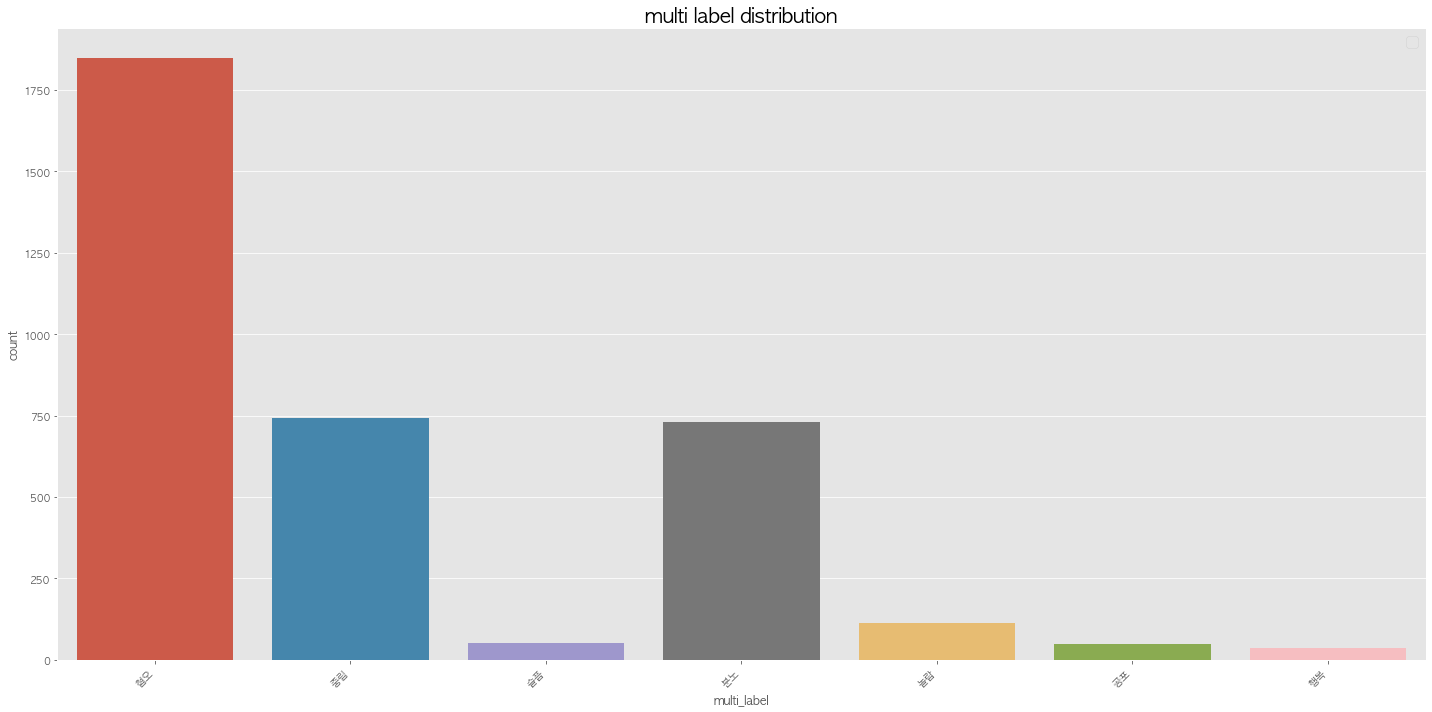

In [55]:
# minister
plt.figure(figsize=(20,10))
plot = sns.countplot(minister['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('multi label distribution m')

No handles with labels found to put in legend.


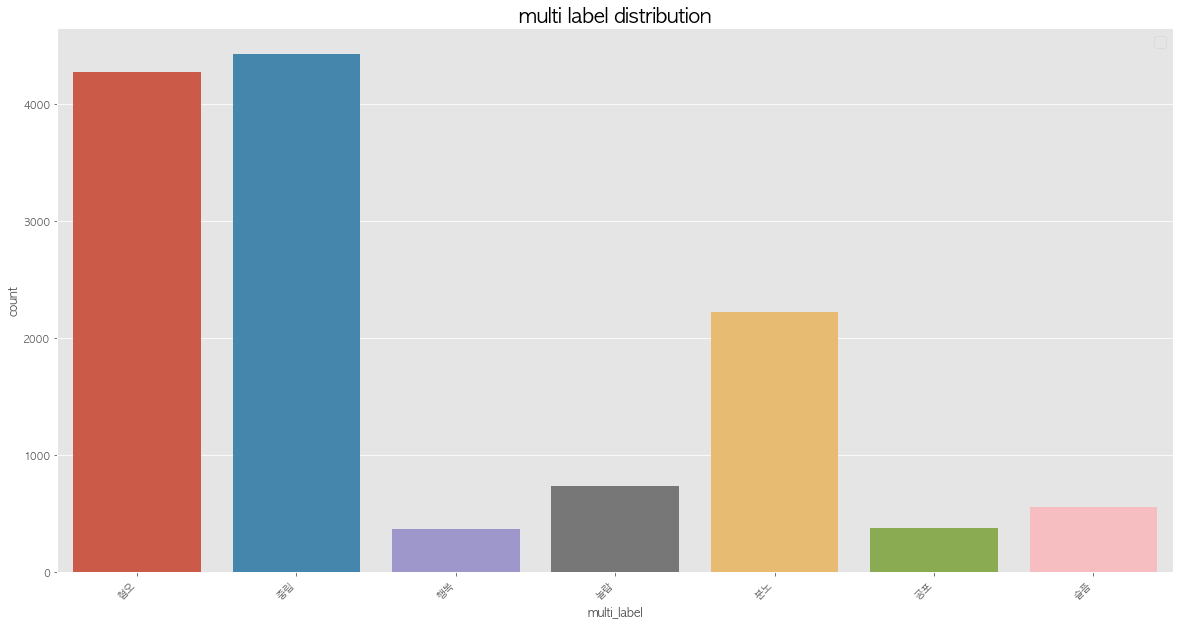

In [56]:
# repeal
plt.figure(figsize=(20,10))
plot = sns.countplot(repeal['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('multi label distribution r')

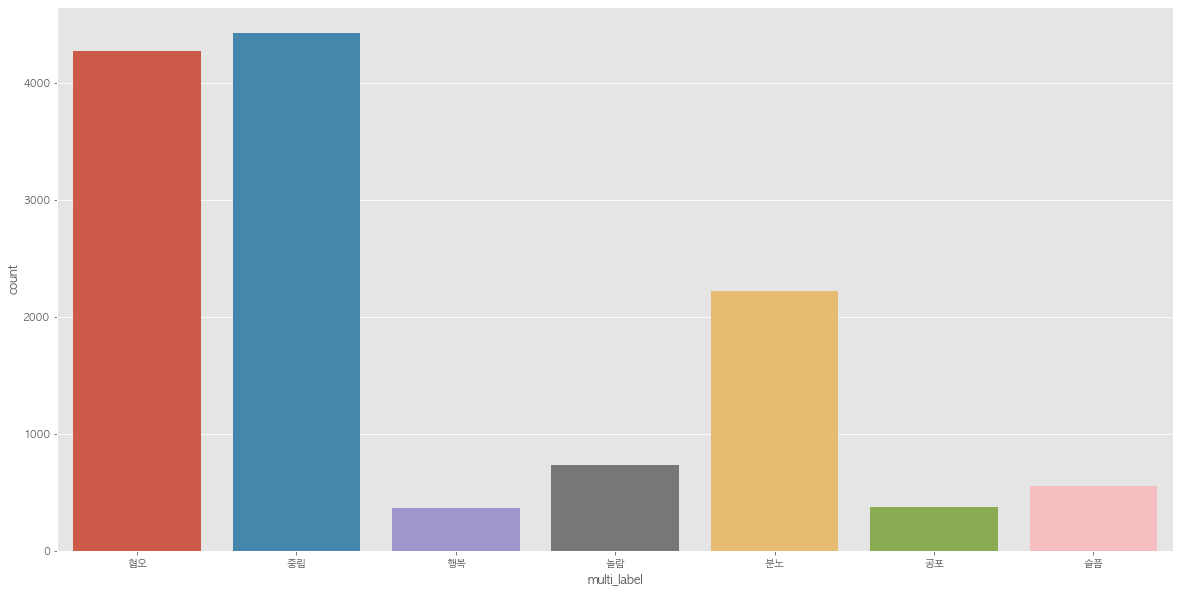

In [57]:
# repeal
plt.figure(figsize=(20,10))
sns.countplot(repeal['multi_label'])
plt.show()
# save_fig('multi label distribution r')

In [58]:
women_policy['multi_label'].unique()

array(['행복', '혐오', '중립', '분노', '공포', '놀람', '슬픔'], dtype=object)

In [59]:
wp_hp = women_policy[women_policy['multi_label'] == '행복']
wp_hate = women_policy[women_policy['multi_label'] == '혐오']
wp_n = women_policy[women_policy['multi_label'] == '중립']
wp_f = women_policy[women_policy['multi_label'] == '분노']
wp_sc = women_policy[women_policy['multi_label'] == '공포']
wp_sur = women_policy[women_policy['multi_label'] == '놀람']
wp_sad = women_policy[women_policy['multi_label'] == '슬픔']

<ipython-input-60-6a27dd5e82c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_sad['tokenized'] = wp_sad['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_sad


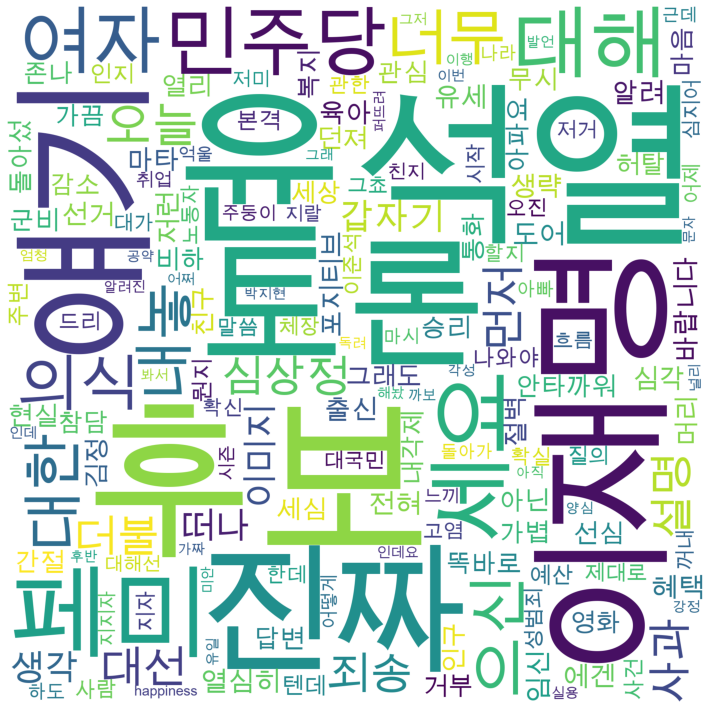

In [60]:
stop_words_w = ['여성', '정책']
wp_sad['tokenized'] = wp_sad['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_sad['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_sad')

In [61]:
wp_sad['tokenized']

137                                 [후보, 선거, 유세, 열심히, 너무]
179                          [저런, 에겐, 임신, 출신, 육아, 혜택, 생략]
304     [윤석열, 후보, 의식, 대한, 마타, 도어, 심각, 포지티브, 윤석열, 후보, 의...
311                                 [그래도, 세심, 답변, 거부, 비하]
389         [이재명, 가끔, 선심, 던져, 아닌, 대한, 관심, 너무, 간절, 존나, 허탈]
468                      [참담, 내놓, 가볍, 무시, 세상, 열리, 영화, 현실]
476                   [마음, 돌아섰, 군비, 감소, 내각제, 얘기, 머리, 아파요]
582                                          [김정, 친구, 통화]
665                             [오늘, 인구, 절벽, 복지, 나와야, 텐데]
708     [심상정, 윤석열, 인지, 예산, 뭔지, 본격, 설명, 토론, 주변, 대해, 제대로...
751     [오늘, 관한, 질의, 토론, 죄송, 말씀, 먼저, 드리, 시작, 더불, 민주당, ...
770                [저거, 심지어, 흐름, 진짜, 오진, 얘기, 갑자기, 먼저, 사과]
789                [대가, 죄송, 이재명, 할지, 확신, 윤석열, 확실, 한데, 고염]
849               [어제, 토론, 얘기, 갑자기, 노동자, 얘기, 꺼내, 심상정, 그쵸]
931      [여자, 대해선, 하도, 지랄, 윤석열, 지지자, 아빠, 저미, 친지, 주둥이, 마시]
941     [진짜, 떠나, 떠나, 취업, 시즌, 나라, 어떻게, 돌아가, 생각, 근데, 진짜,...
979               [happiness, 이미지, 엄청, 민주당, 박지현, 내놓, 이미지]
1037    [생각, 해

## pos neg label distribution

No handles with labels found to put in legend.


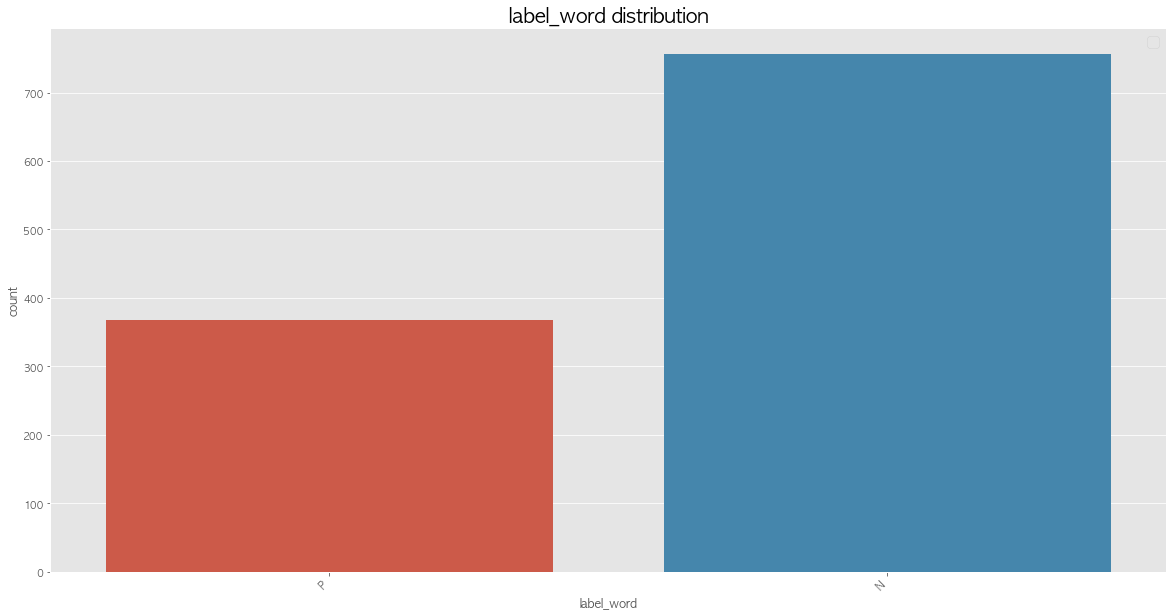

In [62]:
# women_policy
plt.figure(figsize=(20,10))
plot = sns.countplot(women_policy['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('pog neg label distribution w')

No handles with labels found to put in legend.


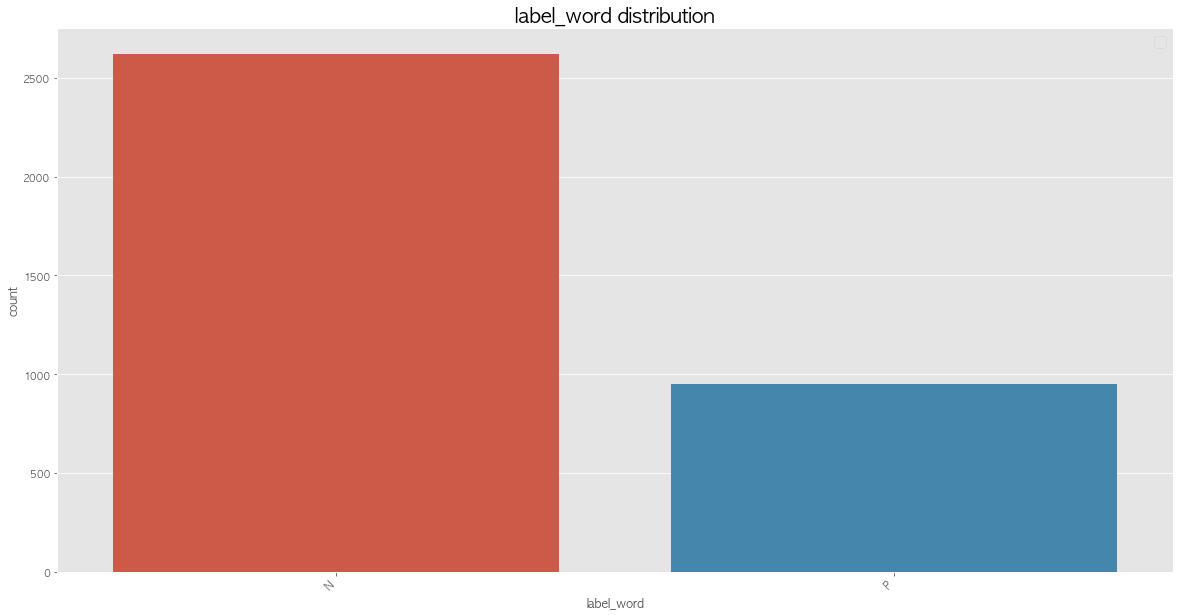

In [63]:
# minister
plt.figure(figsize=(20,10))
plot = sns.countplot(minister['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('pog neg label distribution m')

No handles with labels found to put in legend.


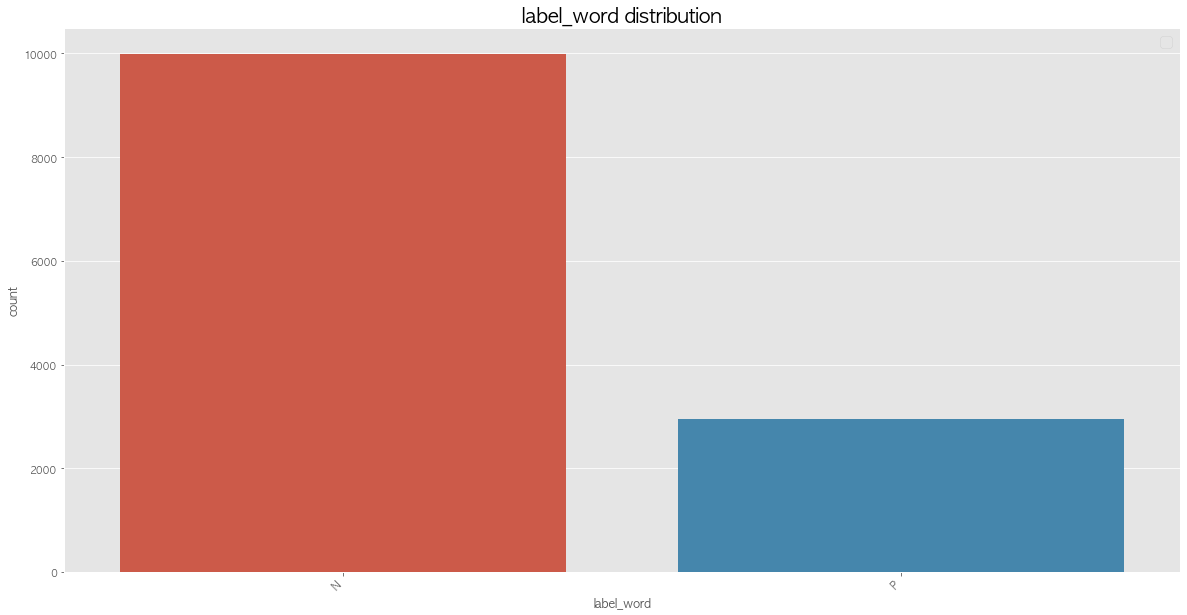

In [64]:
# repeal
plt.figure(figsize=(20,10))
plot = sns.countplot(repeal['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('pog neg label distribution r')

In [65]:
# sunburst 그래프
# word2vec
# network

In [66]:
women_policy['count'] = 1
minister['count'] = 1 
repeal['count'] = 1

In [92]:
import plotly.express as px
fig = px.sunburst(women_policy, 
                  path=['multi_label', 'sm_label'], 
                  values='count')
fig.show()

In [93]:
import plotly.express as px
fig = px.sunburst(minister, 
                  path=['multi_label', 'sm_label'], 
                  values='count')
fig.show()

In [94]:
import plotly.express as px
fig = px.sunburst(repeal, 
                  path=['multi_label', 'sm_label'], 
                  values='count')
fig.show()

In [70]:
women_policy

datetime                   id  \
0     2022-02-10 01:57:58+00:00  1491592245379678208   
1     2022-02-10 03:03:04+00:00  1491608626779557890   
2     2022-02-10 03:06:08+00:00  1491609398858248192   
3     2022-02-10 05:03:53+00:00  1491639032224583681   
4     2022-02-10 07:20:30+00:00  1491673415773683713   
...                         ...                  ...   
1123  2022-03-08 16:33:58+00:00  1501234781530382337   
1124  2022-03-08 16:57:04+00:00  1501240596077236224   
1125  2022-03-08 22:16:05+00:00  1501320879464144899   
1126  2022-03-08 22:25:14+00:00  1501323180069175301   
1127  2022-03-08 23:56:01+00:00  1501346026988343297   

                                                   text         username  \
0     대통령을 본 이래 가장 강한 발언이 나왔음 각하 충성충성충성 민주당의 여성정책 노동...            cue3u   
1     문대통령은 지지하고 이재명은 존나 싫어서 뽑을 사람 없어가지고 괴롭네 어쩌네 하는 ...  Unkn0wnG0ldf1sh   
2     언제는 피해자 언급과 사과를 안 했으니 민주당에 돌아서겠다 하더니, 이제는 살인자가...        remmremmr   
3     신남성연대 배인규랑 하등 다를바 없는 놈을 당 공식 직위에 앉혀놓은 안철수를 여성 ...           dthebi   
4     여가부 폐지하겠다는 말은 빈대 잡겠다고 초가삼간 태우는 소리와 다를 바 없습니다. ...           UBzop1   
...                                                 ...              ...   
1123  출구조사하시는분들 꼭 출구조사 참가해주시고 지지이유에 꼭 여성정책이라고 말씀해주세요...    YAnPy_inthere   
1124  '윤석열 후보가 대통령이 되고 이준석 국민의힘 대표가 여당 대표가 된다면, 정말로 ...       JungJaHyun   
1125  여성의날에 여성정책을 관장하는 정부부처에 대해 얘기한 게 뭐가 문제? 문제는 '여가...       boktheseon   
1126                          …? 윤석열 여성 정책이 있어야 비교를 하지            dthebi   
1127                   아들 둘있고 딸은없는데 여성정책에 몰두하는 남자후보라  흠          also010   

                                              tokenized    label     score  \
0     [대통령, 이래, 가장, 강한, 발언, 나왔, 각하, 충성, 충성, 충성, 민주당,...  LABEL_1  0.881262   
1     [대통령, 지지, 이재명, 존나, 사람, 괴롭, 진짜, 여성, 정책, 자빠진, 제대...  LABEL_1  0.884214   
2     [언제, 피해자, 언급, 사과, 했으니, 민주당, 돌아서, 이제, 살인, 내세우, ...  LABEL_0  0.952992   
3     [신남, 연대, 배인규, 하등, 다를, 공식, 직위, 앉혀, 안철수, 여성, 정책,...  LABEL_0  0.996506   
4     [폐지, 빈대, 초가삼간, 태우, 다를, 여성, 정책, 젠더, 갈등, 원인, 청소년...  LABEL_0  0.800030   
...                                                 ...      ...       ...   
1123     [출구, 조사, 출구조사, 참가, 이유, 여성, 정책, 말씀, 세요, 강조, 세요]  LABEL_1  0.988144   
1124  [윤석열, 후보, 대통령, 이준석, 국민, 대표, 여당, 대표, 된다면, 정말로, ...  LABEL_1  0.937473   
1125  [여성, 여성, 정책, 관장, 정부, 부처, 대해, 얘기, 문제, 문제, 폐지, 따...  LABEL_0  0.883212   
1126                                  [윤석열, 여성, 정책, 비교]  LABEL_0  0.922042   
1127                           [아들, 여성, 정책, 몰두, 남자, 후보]  LABEL_0  0.966645   

     label_word                                            text_re  \
0             P  대통령을 본 이래 가장 강한 발언이 나왔음 각하 충성충성충성 민주당의 여성정책 노동...   
1             P  문대통령은 지지하고 이재명은 존나 싫어서 뽑을 사람 없어가지고 괴롭네 어쩌네 하는 ...   
2             N  언제는 피해자 언급과 사과를 안 했으니 민주당에 돌아서겠다 하더니, 이제는 살인자가...   
3             N  신남성연대 배인규랑 하등 다를바 없는 놈을 당 공식 직위에 앉혀놓은 안철수를 여성 ...   
4             N  여가부 폐지하겠다는 말은 빈대 잡겠다고 초가삼간 태우는 소리와 다를 바 없습니다. ...   
...         ...                                                ...   
1123          P  출구조사하시는분들 꼭 출구조사 참가해주시고 지지이유에 꼭 여성정책이라고 말씀해주세요...   
1124          P  '윤석열 후보가 대통령이 되고 이준석 국민의힘 대표가 여당 대표가 된다면, 정말로 ...   
1125          N  여성의날에 여성정책을 관장하는 정부부처에 대해 얘기한 게 뭐가 문제? 문제는 '여가...   
1126          N                          …? 윤석열 여성 정책이 있어야 비교를 하지    
1127          N                   아들 둘있고 딸은없는데 여성정책에 몰두하는 남자후보라  흠   

     multi_label  ...    남성  성소수자  인종/국적    연령    지역    종교  기타 혐오  악플/욕설  \
0             행복  ...  0.01  0.01   0.02  0.01  0.01  0.01   0.02   0.12   
1             혐오  ...  0.01  0.01   0.01  0.01  0.01  0.01   0.02   0.49   
2             혐오  ...  0.01  0.02   0.01  0.00  0.01  0.01   0.03   0.54   
3             혐오  ...  0.04  0.02   0.02  0.01  0.01  0.00   0.07   0.30   
4             중립  ...  0.01  0.03   0.02  0.01  0.01  0.00   0.03   0.11   
...          ...  ...   ...   ...    ...   ...   ...   ...    ...    ...   
1123          중립  ...  0.02  0.02   0.01  0.01  0.01  0.01   0.01   0.07   
1124          중립  ...  0.01  0.02   0.01  0.01  0.0

In [71]:
a = women_policy[(women_policy['label_word'] == 'N') & (women_policy['multi_label'] == '행복')]
b = women_policy[(women_policy['label_word'] == 'P') & (women_policy['multi_label'] == '혐오')]

In [72]:
test_a = sum(a['tokenized'], [])

keywords  count
0       여성     13
1       정책     13
2      이재명      3
3       사람      3
4      이준석      3
5      합니다      2
6       임금      2
7       동일      2
8      심상정      2
9       후보      2

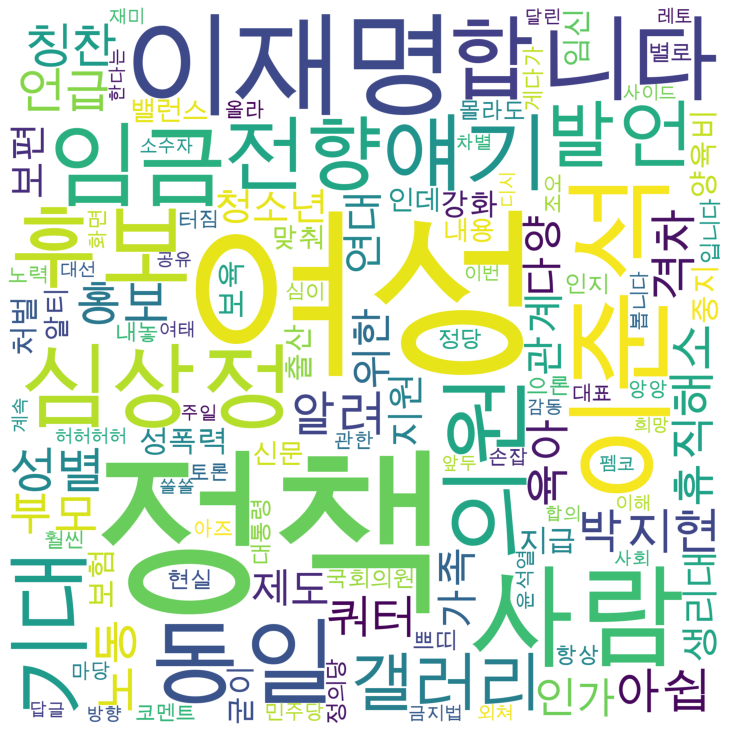

In [73]:
test_a = sum(a['tokenized'], [])
c, cw = common_words(test_a, 100)
wordcloud(c)
cw_table(cw)[:10]
# save_fig('wordcloud without wp_sad')

In [74]:
plt.figure(figsize=(50, 30))
# plt.suptitle('wordcloud', fontsize=50)

for idx, word in enumerate(test_list):
#     word_tokens = nltk.word_tokenize(''.join(compare[i]))
#     tokens_pos = nltk.pos_tag(word_tokens)
#     NN_words = NN_word(tokens_pos)
#     lemmatized_words = lemmatized_word(NN_words)
#     final_NN_words = unique_NN_word(lemmatized_words)
#     noun_text = ' '.join(final_NN_words)
    wordcloud = WordCloud(max_font_size=59, width=500, height=300, background_color='white', relative_scaling=.2).generate(f'{word}["text_re"]')
    plt.subplot(1,2,idx+1)
#     plt.title(name[i], fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# plt.tight_layout()
# plt.show()
# save_fig('wordcloud')

NameError: name 'test_list' is not defined

<Figure size 3600x2160 with 0 Axes>

In [ ]:
# N - 행복
# P - 혐오
# P - 놀람
# P - 공포
# P - 분노
# P - 슬픔

# N - 혐오 - clean
# N - 중립 - clean 제외